# Лабораторна робота 3 Товстенко Артем Фб-31мп

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Частина 1  Повнозв'язані нейронні мережі, класифікація даних

In [3]:
data = pd.read_csv("train.csv")

In [4]:
X = data.drop('price_range', axis=1)
y = data['price_range']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
22/22 - 1s - loss: 48.9451 - accuracy: 0.3964 - val_loss: 16.0303 - val_accuracy: 0.5483 - 556ms/epoch - 25ms/step
Epoch 2/100
22/22 - 0s - loss: 12.7799 - accuracy: 0.5393 - val_loss: 6.3205 - val_accuracy: 0.6067 - 49ms/epoch - 2ms/step
Epoch 3/100
22/22 - 0s - loss: 7.9104 - accuracy: 0.5557 - val_loss: 6.9967 - val_accuracy: 0.5867 - 48ms/epoch - 2ms/step
Epoch 4/100
22/22 - 0s - loss: 4.5881 - accuracy: 0.6129 - val_loss: 8.0291 - val_accuracy: 0.5017 - 56ms/epoch - 3ms/step
Epoch 5/100
22/22 - 0s - loss: 4.4487 - accuracy: 0.5950 - val_loss: 5.1317 - val_accuracy: 0.5450 - 57ms/epoch - 3ms/step
Epoch 6/100
22/22 - 0s - loss: 4.5736 - accuracy: 0.6071 - val_loss: 4.3400 - val_accuracy: 0.6117 - 48ms/epoch - 2ms/step
Epoch 7/100
22/22 - 0s - loss: 4.0964 - accuracy: 0.6164 - val_loss: 3.6443 - val_accuracy: 0.5983 - 49ms/epoch - 2ms/step
Epoch 8/100
22/22 - 0s - loss: 3.9362 - accuracy: 0.6036 - val_loss: 3.2789 - val_accuracy: 0.6400 - 50ms/epoch - 2ms/step
Epoch 9/100

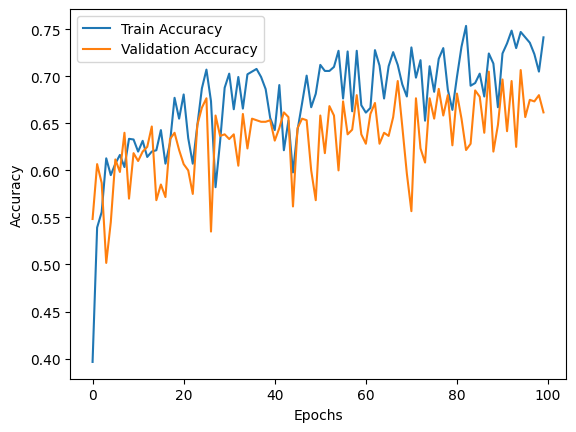

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print(classification_report(y_test_decoded, y_pred_decoded))
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
print(conf_matrix)

19/19 [==============================] - 0s 778us/step
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       150
           1       0.50      0.87      0.64       150
           2       0.60      0.33      0.42       150
           3       0.77      0.79      0.78       150

    accuracy                           0.66       600
   macro avg       0.71      0.66      0.65       600
weighted avg       0.71      0.66      0.65       600

[[ 99  49   1   1]
 [  4 131  10   5]
 [  0  71  49  30]
 [  0  10  22 118]]


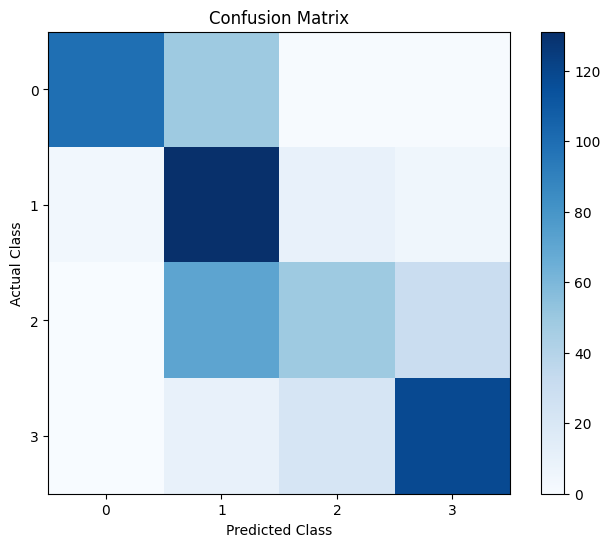

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(4), label_encoder.classes_)
plt.yticks(np.arange(4), label_encoder.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## Завдання 2, Згорткові нейронні мережі, класифікація зображення

In [11]:
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory('train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [12]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.72156864 0.72156864 0.72156864]
  [0.7239003  0.7239003  0.7239003 ]
  [0.7254902  0.7254902  0.7254902 ]
  ...
  [0.71225697 0.71225697 0.71225697]
  [0.7118128  0.7118128  0.7118128 ]
  [0.7113686  0.7113686  0.7113686 ]]

 [[0.72156864 0.72156864 0.72156864]
  [0.72345614 0.72345614 0.72345614]
  [0.7254902  0.7254902  0.7254902 ]
  ...
  [0.70980394 0.70980394 0.70980394]
  [0.70980394 0.70980394 0.70980394]
  [0.70980394 0.70980394 0.70980394]]

 [[0.72156864 0.72156864 0.72156864]
  [0.723012   0.723012   0.723012  ]
  [0.7254902  0.7254902  0.7254902 ]
  ...
  [0.7083859  0.7083859  0.7083859 ]
  [0.7079417  0.7079417  0.7079417 ]
  [0.70749754 0.70749754 0.70749754]]

 ...

 [[0.8352942  0.8352942  0.8352942 ]
  [0.8352942  0.8352942  0.8352942 ]
  [0.8352942  0.8352942  0.8352942 ]
  ...
  [0.87843144 0.87843144 0.87843144]
  [0.87843144 0.87843144 0.87843144]
  [0.87843144 0.87843144 0.87843144]]

 [[0.8368841  0.8368841  0.8368841 ]
  [0.83732826 0.83732826 0.83732826]


In [13]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [14]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory('test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [15]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.05134381 0.07487322 0.12977518]
  [0.05490196 0.07843138 0.13333334]
  [0.05573329 0.0792627  0.13416468]
  ...
  [0.08155607 0.10508548 0.16783057]
  [0.08213621 0.10566562 0.16841073]
  [0.08307976 0.10660918 0.16862746]]

 [[0.05076366 0.07429308 0.12919503]
  [0.05464208 0.07817149 0.13307346]
  [0.05490196 0.07843138 0.13333334]
  ...
  [0.08851603 0.11204544 0.16862746]
  [0.08967631 0.11320572 0.16862746]
  [0.09019608 0.1137255  0.16862746]]

 [[0.05018352 0.07371293 0.12861489]
  [0.05406194 0.07759135 0.13249332]
  [0.05490196 0.07843138 0.13333334]
  ...
  [0.09019608 0.1137255  0.16862746]
  [0.09019608 0.1137255  0.16862746]
  [0.09075031 0.11427972 0.16918169]]

 ...

 [[0.25743797 0.29273212 0.32802624]
  [0.26064172 0.29593584 0.33122998]
  [0.2641226  0.29941672 0.33471084]
  ...
  [0.24175978 0.25352448 0.2809755 ]
  [0.24621014 0.25797486 0.28542584]
  [0.33738056 0.34914526 0.37659624]]

 [[0.2804314  0.3157255  0.35101965]
  [0.2815733  0.3168674  0.35216153]


In [17]:
sz = 128

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_9 (Dense)             (None, 96)               

In [19]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 22s 200ms/step - loss: 1.8957 - accuracy: 0.2572 - val_loss: 1.8199 - val_accuracy: 0.2964
Epoch 2/50
105/105 [==============================] - 20s 187ms/step - loss: 1.7487 - accuracy: 0.3288 - val_loss: 1.6556 - val_accuracy: 0.3801
Epoch 3/50
105/105 [==============================] - 19s 183ms/step - loss: 1.6215 - accuracy: 0.4141 - val_loss: 1.5274 - val_accuracy: 0.4502
Epoch 4/50
105/105 [==============================] - 19s 179ms/step - loss: 1.4700 - accuracy: 0.4743 - val_loss: 1.4207 - val_accuracy: 0.4920
Epoch 5/50
105/105 [==============================] - 19s 178ms/step - loss: 1.3259 - accuracy: 0.5197 - val_loss: 1.2889 - val_accuracy: 0.5351
Epoch 6/50
105/105 [==============================] - 20s 187ms/step - loss: 1.2164 - accuracy: 0.5567 - val_loss: 1.1816 - val_accuracy: 0.5793
Epoch 7/50
105/105 [==============================] - 20s 188ms/step - loss: 1.1374 - accuracy: 0.5892 - val_loss: 1.1476 - val_ac

In [21]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 2s 91ms/step - loss: 1.0573 - accuracy: 0.7466


In [22]:
scores

[1.057281255722046, 0.7466174364089966]

In [23]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
type(history.history['loss'])

list

In [25]:
len(history.history['loss'])

50

In [26]:
history.history['loss'][:5]

[1.8957245349884033,
 1.7486604452133179,
 1.6214519739151,
 1.46995210647583,
 1.3259435892105103]

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

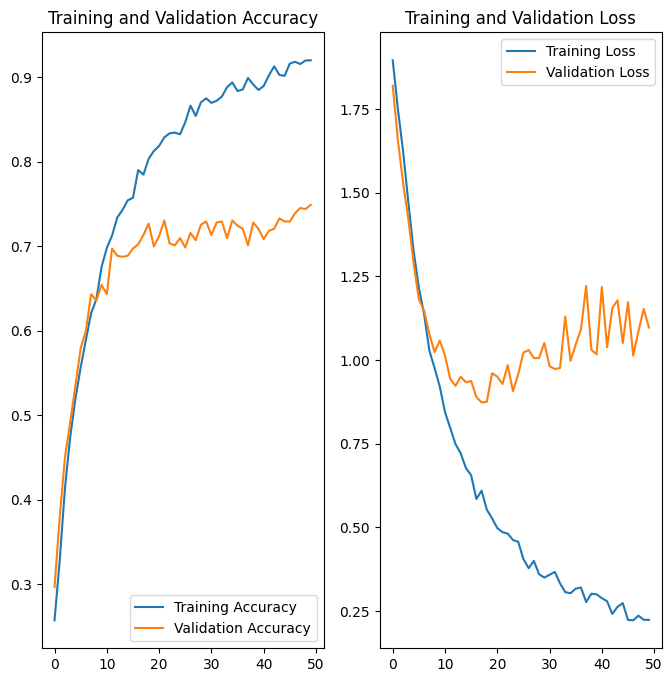

In [28]:
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 17ms/step


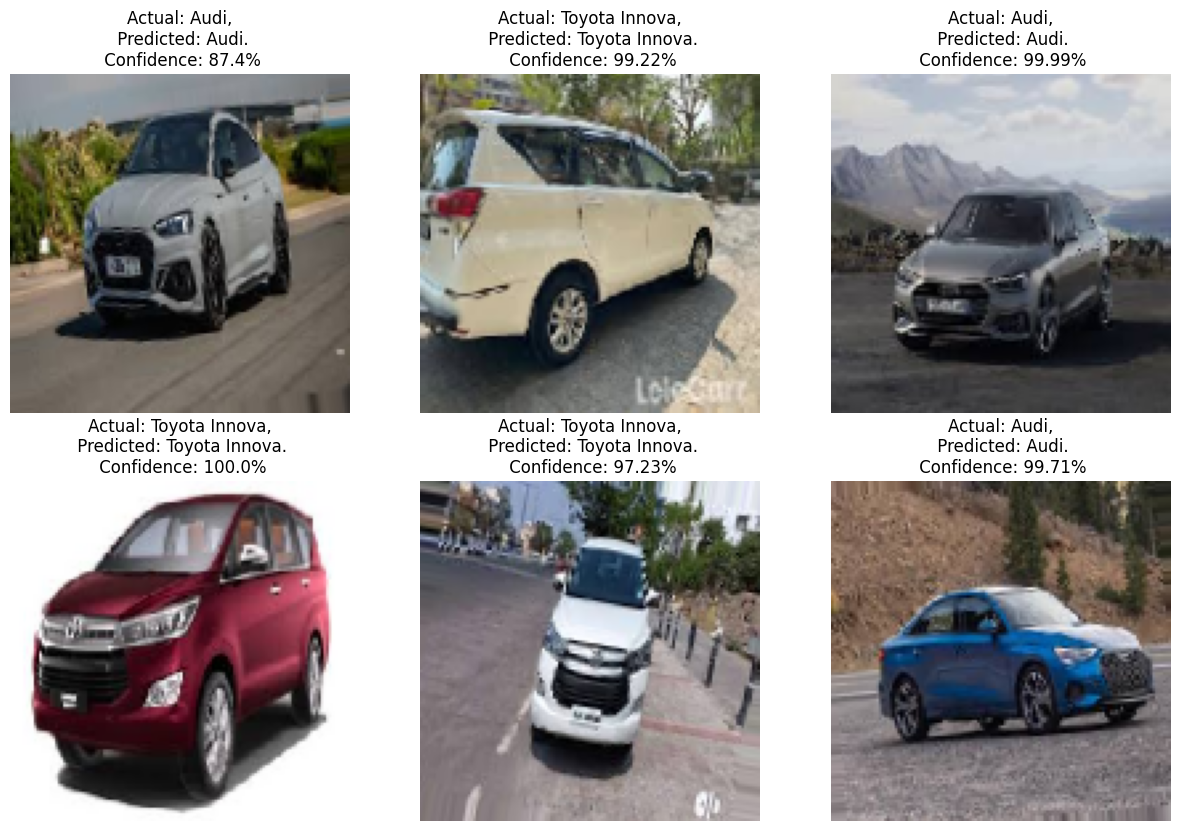

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Завдання 3

In [39]:
data = pd.read_csv("spam.csv")

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gesta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gesta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
def preprocess_text(text):
    text = text.lower() 
    text = ' '.join(word for word in word_tokenize(text) if word.isalnum())
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [41]:
data['original_text'] = data['v2']
data['filtered_text'] = data['v2'].apply(preprocess_text)

In [42]:
print("Original Text:")
print(data['original_text'].head())

print("Filtered Text:")
print(data['filtered_text'].head())

Original Text:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: original_text, dtype: object
Filtered Text:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: filtered_text, dtype: object


In [43]:
label_encoder = LabelEncoder()
data['v1'] = label_encoder.fit_transform(data['v1'])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['filtered_text'])
X = tokenizer.texts_to_sequences(data['filtered_text'])
X = pad_sequences(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)

In [45]:
embedding_dim = 64
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=X.shape[1]))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred.flatten())

Epoch 1/10
112/112 [==============================] - 2s 11ms/step - loss: 0.3128 - accuracy: 0.9001 - val_loss: 0.1230 - val_accuracy: 0.9664
Epoch 2/10
112/112 [==============================] - 1s 9ms/step - loss: 0.0577 - accuracy: 0.9854 - val_loss: 0.0892 - val_accuracy: 0.9765
Epoch 3/10
112/112 [==============================] - 1s 9ms/step - loss: 0.0200 - accuracy: 0.9955 - val_loss: 0.0858 - val_accuracy: 0.9776
Epoch 4/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0944 - val_accuracy: 0.9753
Epoch 5/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9997 - val_loss: 0.1004 - val_accuracy: 0.9753
Epoch 6/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1059 - val_accuracy: 0.9742
Epoch 7/10
112/112 [==============================] - 1s 8ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1114 - val_accuracy: 0.9742
Epoch

In [47]:
print("Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[963   2]
 [ 24 126]]
